In [1]:
PROJECT_DIR = '/home/thanuja/Dropbox/capstone/'
APP_SYS_NAME = 'BGL'
#APP_SYS_NAME = 'Thunderbird'

BASE_DIR = PROJECT_DIR + 'output/'
RAW_DIR = PROJECT_DIR + 'raw_files/'

In [2]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, classification_report, accuracy_score, confusion_matrix , precision_score, recall_score, f1_score
from sklearn.metrics import completeness_score, homogeneity_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import PrecisionRecallDisplay
from scipy.spatial.distance import cosine
import warnings
import matplotlib.pyplot as plt
import sys
import subprocess
import random
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.linear_model import SGDOneClassSVM

random.seed(2)
sys.path.append(PROJECT_DIR) # this is done to make the import of ad_feature_extraction work
from ad_feature_extraction import parsers

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from matplotlib.lines import Line2D

random_state=5

Input_data Shape: (94000, 64)
label
False    86698
True      7302
Name: count, dtype: int64


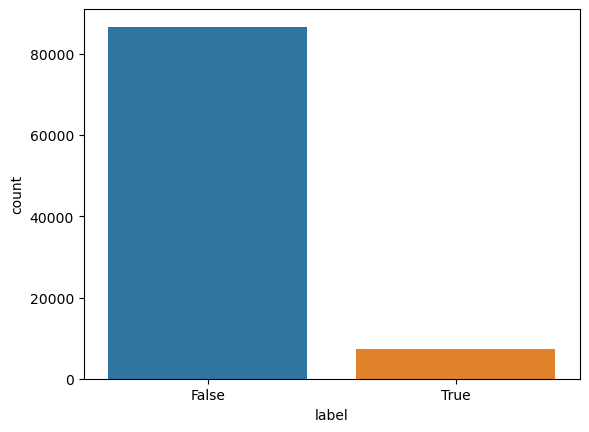

In [3]:
input_data = pd.read_csv(BASE_DIR + APP_SYS_NAME + '_clusters2.csv')

print("Input_data Shape:",input_data.shape)
print(input_data['label'].value_counts())

sns.countplot(x=input_data['label'])
plt.show()

# Effect of cluster filtering

In [4]:
clusters = input_data['clusters'].values
clusters2 = input_data['cluster2'].values

print("Between first and second clustering:____________________________")
print(f"Completeness Score: \n {completeness_score(clusters, clusters2)}\n")
print(f"Homogeneity Score: \n {homogeneity_score(clusters, clusters2)}\n") 

Between first and second clustering:____________________________
Completeness Score: 
 0.9452833584018082

Homogeneity Score: 
 0.9603265119616633



In [5]:
labels = input_data['label']
print("Between first clusters and label:____________________________")
print(f"Completeness Score: \n {completeness_score(labels, clusters)}\n")
print(f"Homogeneity Score: \n {homogeneity_score(labels, clusters)}\n") 

print("Between second clusters and label:____________________________")
print(f"Completeness Score: \n {completeness_score(labels, clusters2)}\n")
print(f"Homogeneity Score: \n {homogeneity_score(labels, clusters2)}\n") 



Between first clusters and label:____________________________
Completeness Score: 
 0.09858856662063913

Homogeneity Score: 
 0.9510578785855297

Between second clusters and label:____________________________
Completeness Score: 
 0.10121898903688036

Homogeneity Score: 
 0.9919717333531236



# Parameter effect on supervised learning

In [6]:
def report(report_name, label_pred, labels):
    report = pd.DataFrame(classification_report(labels, label_pred, output_dict=True))
    print(f"{report_name} Result:\n================================================")        
    print(f"Accuracy Score: {accuracy_score(labels, label_pred) * 100:.2f}%")
    print("_______________________________________________")
    print(f"CLASSIFICATION REPORT:\n{report}")
    print("_______________________________________________")
    print(f"Confusion Matrix: \n {confusion_matrix(labels, label_pred)}\n")
    print("_______________________________________________")
    print(f'F1 Score: \n {f1_score(labels, label_pred)}')
    print("_______________________________________________")
    print(f'Precision Score: \n {precision_score(labels, label_pred)}')
    print("_______________________________________________")
    print(f'Recall Score: \n {recall_score(labels, label_pred)}')
    print("_______________________________________________")
    print(f'Roc AUC Score: \n {roc_auc_score(labels, label_pred)}')
   
    ConfusionMatrixDisplay.from_predictions(labels, label_pred)
    plt.show()
    
    PrecisionRecallDisplay.from_predictions(labels, label_pred, name=report_name)
    plt.show()

With Params DecisionTreeClassifier Test Result:
Accuracy Score: 98.55%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.999529     0.865130  0.985482      0.932329      0.987320
recall         0.984495     0.995358  0.985482      0.989927      0.985482
f1-score       0.991955     0.925686  0.985482      0.958821      0.985935
support    15092.000000  1508.000000  0.985482  16600.000000  16600.000000
_______________________________________________
Confusion Matrix: 
 [[14858   234]
 [    7  1501]]

_______________________________________________
F1 Score: 
 0.9256860931236508
_______________________________________________
Precision Score: 
 0.8651296829971181
_______________________________________________
Recall Score: 
 0.9953580901856764
_______________________________________________
Roc AUC Score: 
 0.9899265934628356


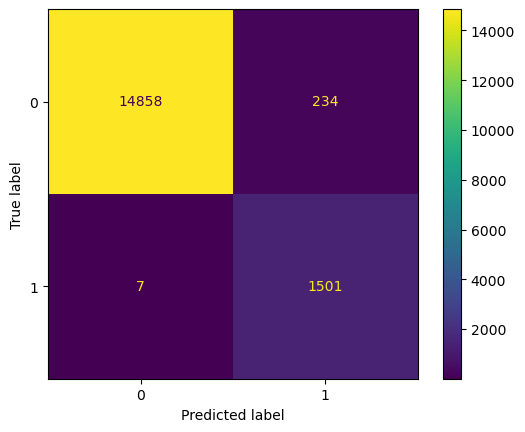

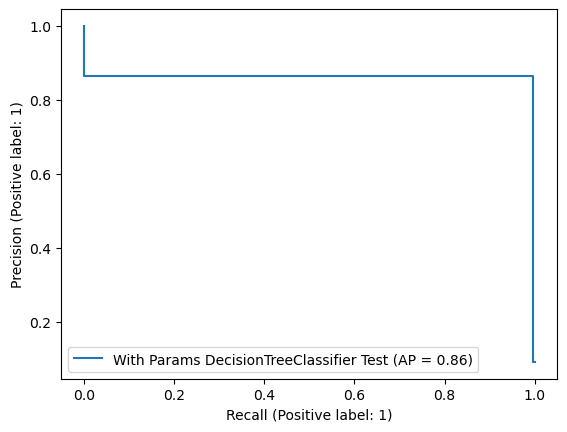

With Params LogisticRegression Test Result:
Accuracy Score: 98.55%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.999529     0.865130  0.985482      0.932329      0.987320
recall         0.984495     0.995358  0.985482      0.989927      0.985482
f1-score       0.991955     0.925686  0.985482      0.958821      0.985935
support    15092.000000  1508.000000  0.985482  16600.000000  16600.000000
_______________________________________________
Confusion Matrix: 
 [[14858   234]
 [    7  1501]]

_______________________________________________
F1 Score: 
 0.9256860931236508
_______________________________________________
Precision Score: 
 0.8651296829971181
_______________________________________________
Recall Score: 
 0.9953580901856764
_______________________________________________
Roc AUC Score: 
 0.9899265934628356


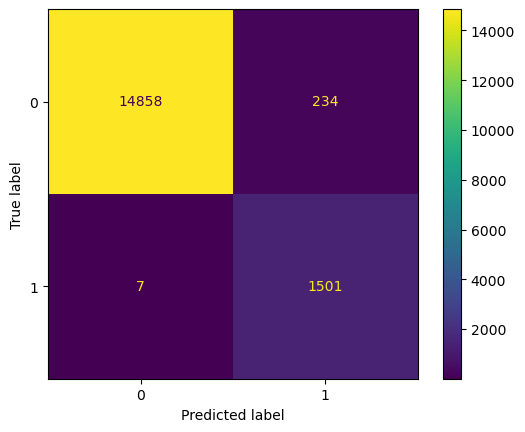

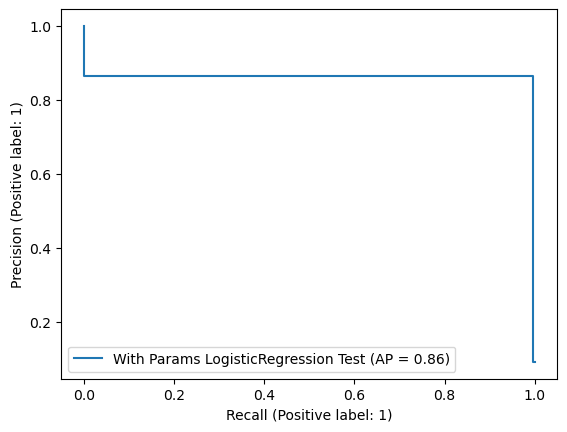

With Params XGBClassifier Test Result:
Accuracy Score: 94.10%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.952253     0.765296  0.941024      0.858774      0.935269
recall         0.984495     0.505968  0.941024      0.745232      0.941024
f1-score       0.968106     0.609182  0.941024      0.788644      0.935500
support    15092.000000  1508.000000  0.941024  16600.000000  16600.000000
_______________________________________________
Confusion Matrix: 
 [[14858   234]
 [  745   763]]

_______________________________________________
F1 Score: 
 0.6091816367265469
_______________________________________________
Precision Score: 
 0.765295887662989
_______________________________________________
Recall Score: 
 0.5059681697612732
_______________________________________________
Roc AUC Score: 
 0.745231633250634


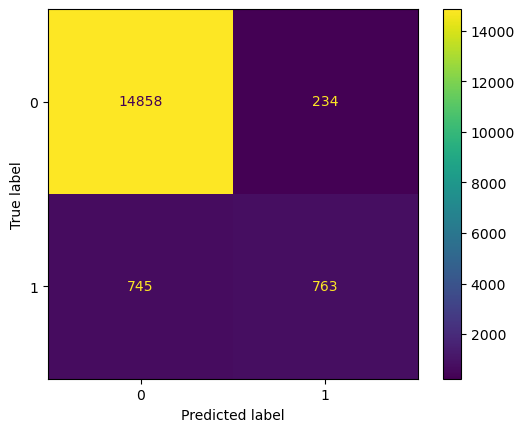

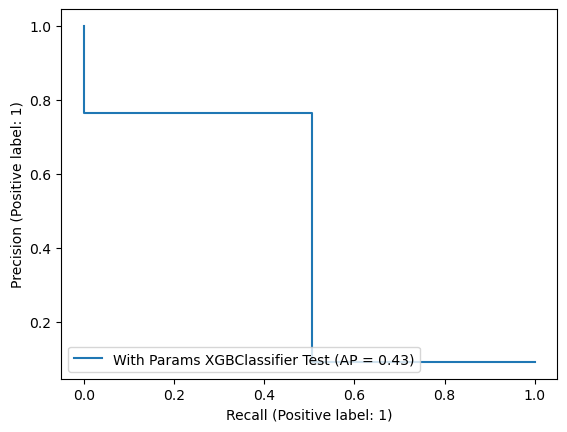

Without Params DecisionTreeClassifier Test Result:
Accuracy Score: 98.55%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.999529     0.865130  0.985482      0.932329      0.987320
recall         0.984495     0.995358  0.985482      0.989927      0.985482
f1-score       0.991955     0.925686  0.985482      0.958821      0.985935
support    15092.000000  1508.000000  0.985482  16600.000000  16600.000000
_______________________________________________
Confusion Matrix: 
 [[14858   234]
 [    7  1501]]

_______________________________________________
F1 Score: 
 0.9256860931236508
_______________________________________________
Precision Score: 
 0.8651296829971181
_______________________________________________
Recall Score: 
 0.9953580901856764
_______________________________________________
Roc AUC Score: 
 0.9899265934628356


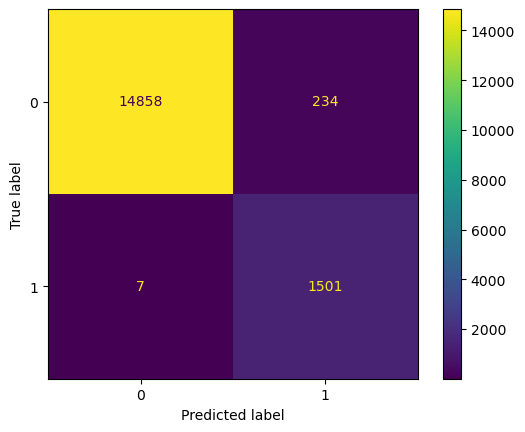

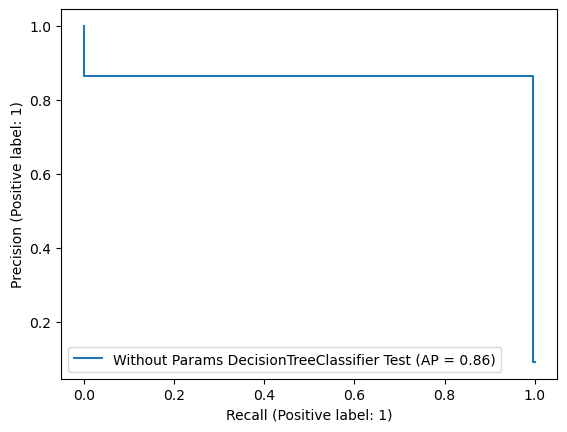

Without Params LogisticRegression Test Result:
Accuracy Score: 98.55%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.999529     0.865130  0.985482      0.932329      0.987320
recall         0.984495     0.995358  0.985482      0.989927      0.985482
f1-score       0.991955     0.925686  0.985482      0.958821      0.985935
support    15092.000000  1508.000000  0.985482  16600.000000  16600.000000
_______________________________________________
Confusion Matrix: 
 [[14858   234]
 [    7  1501]]

_______________________________________________
F1 Score: 
 0.9256860931236508
_______________________________________________
Precision Score: 
 0.8651296829971181
_______________________________________________
Recall Score: 
 0.9953580901856764
_______________________________________________
Roc AUC Score: 
 0.9899265934628356


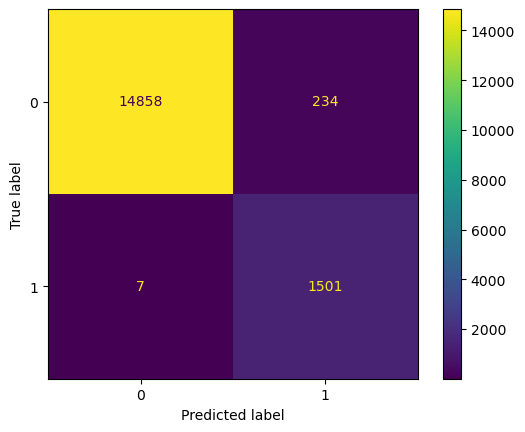

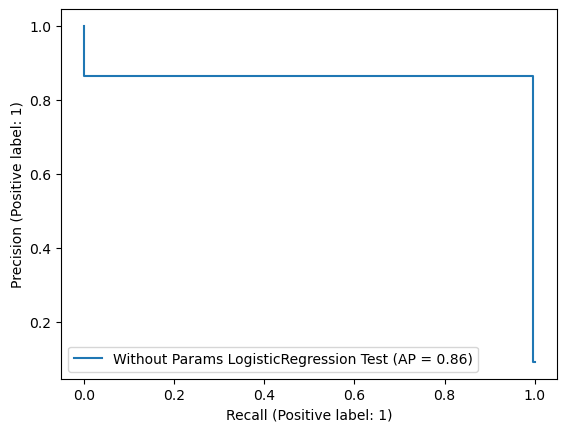

Without Params XGBClassifier Test Result:
Accuracy Score: 94.10%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.952253     0.765296  0.941024      0.858774      0.935269
recall         0.984495     0.505968  0.941024      0.745232      0.941024
f1-score       0.968106     0.609182  0.941024      0.788644      0.935500
support    15092.000000  1508.000000  0.941024  16600.000000  16600.000000
_______________________________________________
Confusion Matrix: 
 [[14858   234]
 [  745   763]]

_______________________________________________
F1 Score: 
 0.6091816367265469
_______________________________________________
Precision Score: 
 0.765295887662989
_______________________________________________
Recall Score: 
 0.5059681697612732
_______________________________________________
Roc AUC Score: 
 0.745231633250634


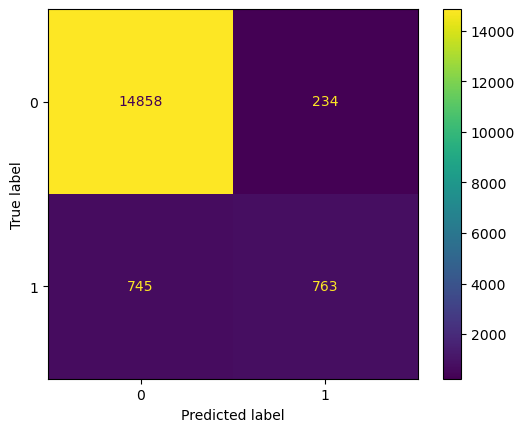

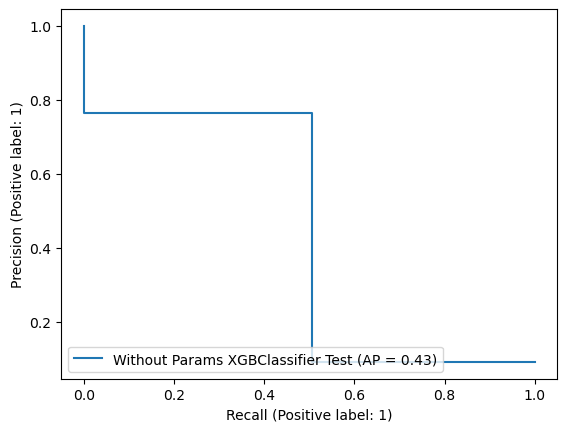

With Params IsolationForest Result:
Accuracy Score: 92.23%
_______________________________________________
CLASSIFICATION REPORT:
                      0       1  accuracy     macro avg  weighted avg
precision      0.922319     0.0  0.922319      0.461160      0.850673
recall         1.000000     0.0  0.922319      0.500000      0.922319
f1-score       0.959590     0.0  0.922319      0.479795      0.885048
support    86698.000000  7302.0  0.922319  94000.000000  94000.000000
_______________________________________________
Confusion Matrix: 
 [[86698     0]
 [ 7302     0]]

_______________________________________________
F1 Score: 
 0.0
_______________________________________________
Precision Score: 
 0.0
_______________________________________________
Recall Score: 
 0.0
_______________________________________________
Roc AUC Score: 
 0.5


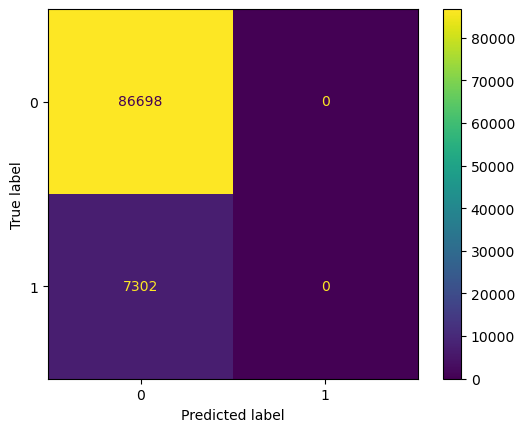

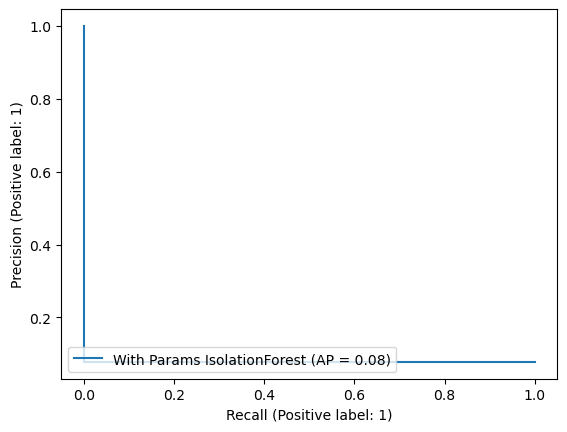

With Params SGDOneClassSVM Result:
Accuracy Score: 45.50%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      1.000000     0.124757  0.455021      0.562378      0.932010
recall         0.409121     1.000000  0.455021      0.704561      0.455021
f1-score       0.580676     0.221837  0.455021      0.401257      0.552801
support    86698.000000  7302.000000  0.455021  94000.000000  94000.000000
_______________________________________________
Confusion Matrix: 
 [[35470 51228]
 [    0  7302]]

_______________________________________________
F1 Score: 
 0.2218374043018593
_______________________________________________
Precision Score: 
 0.12475653511019989
_______________________________________________
Recall Score: 
 1.0
_______________________________________________
Roc AUC Score: 
 0.7045606588387275


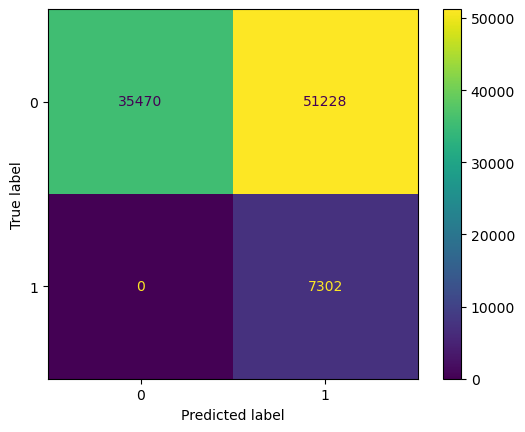

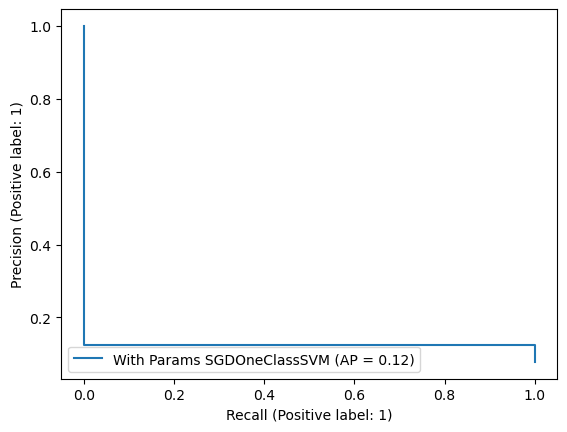

Without Params IsolationForest Result:
Accuracy Score: 92.23%
_______________________________________________
CLASSIFICATION REPORT:
                      0       1  accuracy     macro avg  weighted avg
precision      0.922319     0.0  0.922319      0.461160      0.850673
recall         1.000000     0.0  0.922319      0.500000      0.922319
f1-score       0.959590     0.0  0.922319      0.479795      0.885048
support    86698.000000  7302.0  0.922319  94000.000000  94000.000000
_______________________________________________
Confusion Matrix: 
 [[86698     0]
 [ 7302     0]]

_______________________________________________
F1 Score: 
 0.0
_______________________________________________
Precision Score: 
 0.0
_______________________________________________
Recall Score: 
 0.0
_______________________________________________
Roc AUC Score: 
 0.5


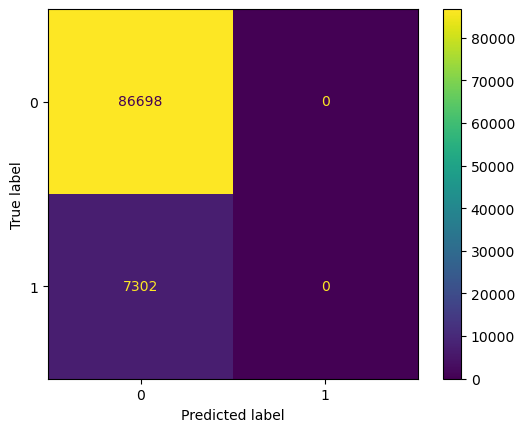

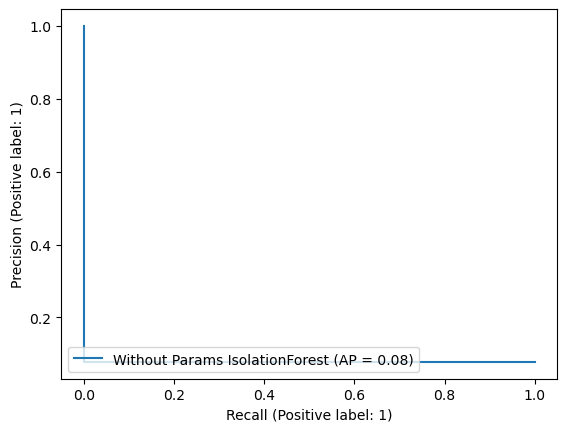

Without Params SGDOneClassSVM Result:
Accuracy Score: 45.50%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      1.000000     0.124757  0.455021      0.562378      0.932010
recall         0.409121     1.000000  0.455021      0.704561      0.455021
f1-score       0.580676     0.221837  0.455021      0.401257      0.552801
support    86698.000000  7302.000000  0.455021  94000.000000  94000.000000
_______________________________________________
Confusion Matrix: 
 [[35470 51228]
 [    0  7302]]

_______________________________________________
F1 Score: 
 0.2218374043018593
_______________________________________________
Precision Score: 
 0.12475653511019989
_______________________________________________
Recall Score: 
 1.0
_______________________________________________
Roc AUC Score: 
 0.7045606588387275


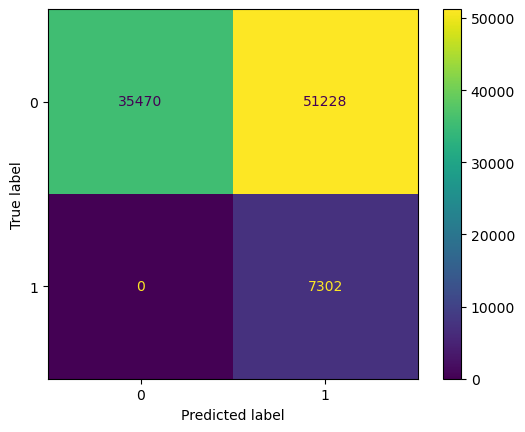

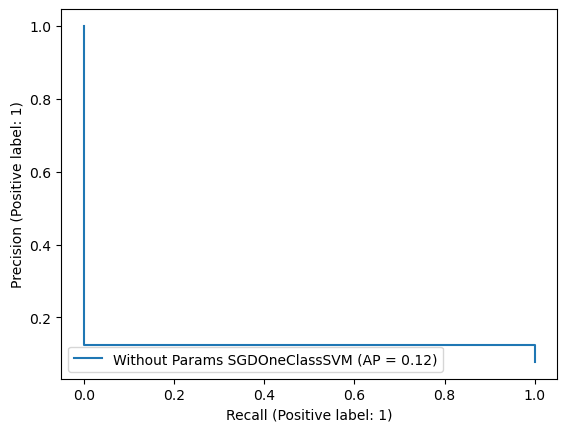

In [7]:
train = pd.read_csv(BASE_DIR + APP_SYS_NAME + '_train_params.csv')
test = pd.read_csv(BASE_DIR + APP_SYS_NAME + '_test_params.csv')

#print("Train Shape:",train.shape,"Test Shape:",test.shape)

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
ohe = OneHotEncoder()

X_clusters = input_data.copy()
X_dummies = pd.get_dummies(X_clusters['clusters'])
X_clusters['label'] = le.fit_transform(X_clusters['label'])

train_dummies = pd.get_dummies(train['clusters'])
train['label'] = le.fit_transform(train['label'])

test_dummies = pd.get_dummies(test['clusters'])
test['label'] = le.fit_transform(test['label'])

for col in train_dummies.columns:
    if not col in test_dummies.columns:
        continue
    col_name = 'c_' + str(col)
    train[col_name] = train_dummies[col]
    test[col_name] = test_dummies[col]

for col in X_dummies.columns:
    col_name = 'c_' + str(col)
    X_clusters[col_name] = X_dummies[col]

for col in train.columns:
    if col not in test.columns:
        test[col] = 0

for col in test.columns:
    if col not in train.columns:
        train[col] = 0

cols_without_params = [col for col in train.columns if col.startswith('c_')]
cols_with_params = cols_without_params + [col for col in train.columns if col.startswith('p_')]

def evaluate_training_set(report_name, cols):
    # Supervised
    X_train = train[cols]
    y_train = train.loc[:,'label']
    X_test = test[cols]
    y_test = test.loc[:,'label']
    for clf in [DecisionTreeClassifier(class_weight='balanced', random_state=random_state),
                  LogisticRegression(class_weight='balanced', random_state=random_state),
                  XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')]:
        clf.fit(X_train, y_train)
        train_pred = clf.predict(X_train)
        test_pred = clf.predict(X_test)
        model_name = type(clf).__name__
        #report(report_name + ' ' + model_name + ' Train', train_pred, y_train)
        report(report_name + ' ' + model_name + ' Test', test_pred, y_test)

def evaluate_unsupervised(report_name, cols):
    # Unsupervised
    X = X_clusters[cols]
    y = X_clusters.loc[:,'label']
    for ModelClass in [IsolationForest, SGDOneClassSVM]:
        model = ModelClass(random_state=random_state)
        model_pred = model.fit_predict(X)
        model_pred[model_pred == 1] = 0
        model_pred[model_pred == -1] = 1
        model_name = type(model).__name__
        report(report_name + ' ' + model_name, model_pred, y)
    
evaluate_training_set('With Params', cols_without_params)
evaluate_training_set('Without Params', cols_with_params)

cols_without_params = [col for col in X_clusters.columns if col.startswith('c_')]
cols_with_params = cols_without_params + [col for col in X_clusters.columns if col.startswith('p_')]

evaluate_unsupervised('With Params', cols_without_params)
evaluate_unsupervised('Without Params', cols_with_params)

# Sliding Window

Sliding Window DecisionTreeClassifier Test Result:
Accuracy Score: 97.90%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.978873     1.000000  0.978974      0.989436      0.979418
recall         1.000000     0.186161  0.978974      0.593081      0.978974
f1-score       0.989324     0.313889  0.978974      0.651606      0.971873
support    45776.000000  1214.000000  0.978974  46990.000000  46990.000000
_______________________________________________
Confusion Matrix: 
 [[45776     0]
 [  988   226]]

_______________________________________________
F1 Score: 
 0.31388888888888894
_______________________________________________
Precision Score: 
 1.0
_______________________________________________
Recall Score: 
 0.18616144975288304
_______________________________________________
Roc AUC Score: 
 0.5930807248764415


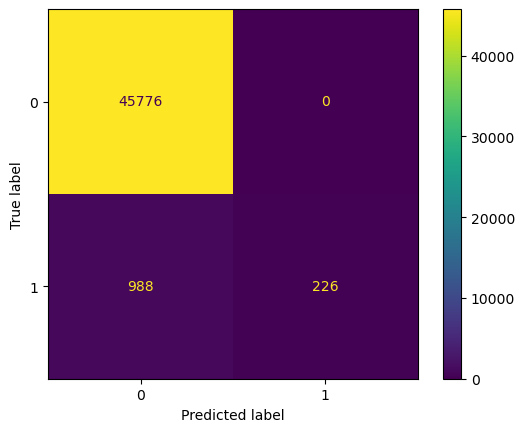

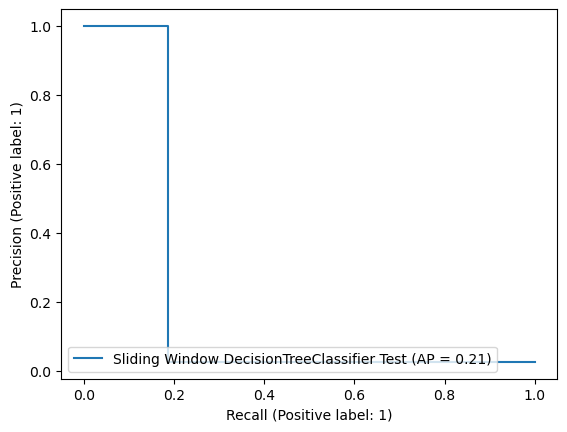

Sliding Window LogisticRegression Test Result:
Accuracy Score: 59.76%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.995171     0.054523  0.597553      0.524847      0.970869
recall         0.589741     0.892092  0.597553      0.740917      0.597553
f1-score       0.740601     0.102766  0.597553      0.421683      0.724122
support    45776.000000  1214.000000  0.597553  46990.000000  46990.000000
_______________________________________________
Confusion Matrix: 
 [[26996 18780]
 [  131  1083]]

_______________________________________________
F1 Score: 
 0.1027660482990938
_______________________________________________
Precision Score: 
 0.05452348587826612
_______________________________________________
Recall Score: 
 0.8920922570016474
_______________________________________________
Roc AUC Score: 
 0.7409168030901282


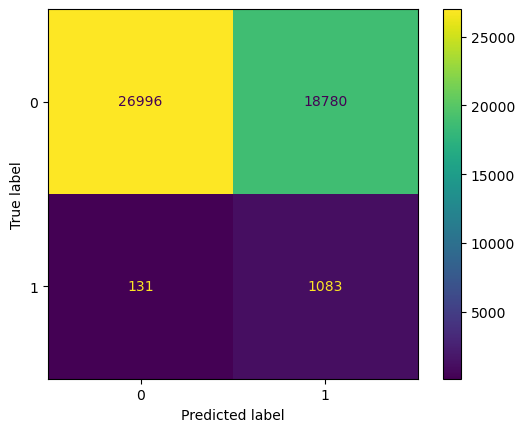

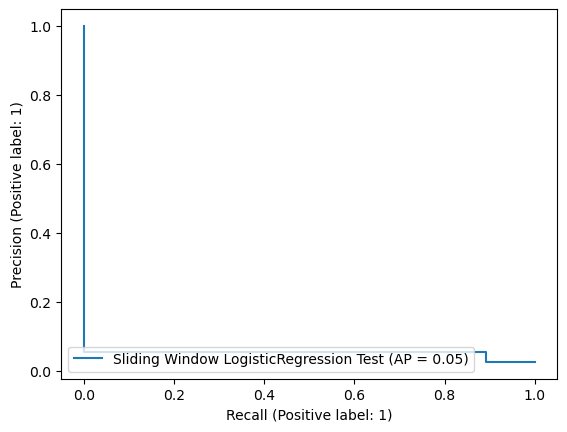

Sliding Window XGBClassifier Test Result:
Accuracy Score: 97.85%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.978454     1.000000  0.978549      0.989227      0.979011
recall         1.000000     0.169687  0.978549      0.584843      0.978549
f1-score       0.989110     0.290141  0.978549      0.639625      0.971052
support    45776.000000  1214.000000  0.978549  46990.000000  46990.000000
_______________________________________________
Confusion Matrix: 
 [[45776     0]
 [ 1008   206]]

_______________________________________________
F1 Score: 
 0.29014084507042254
_______________________________________________
Precision Score: 
 1.0
_______________________________________________
Recall Score: 
 0.1696869851729819
_______________________________________________
Roc AUC Score: 
 0.5848434925864909


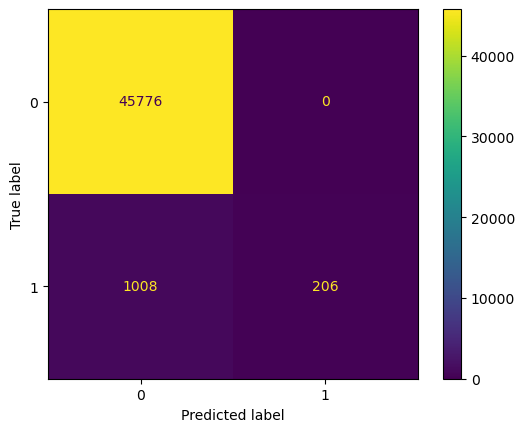

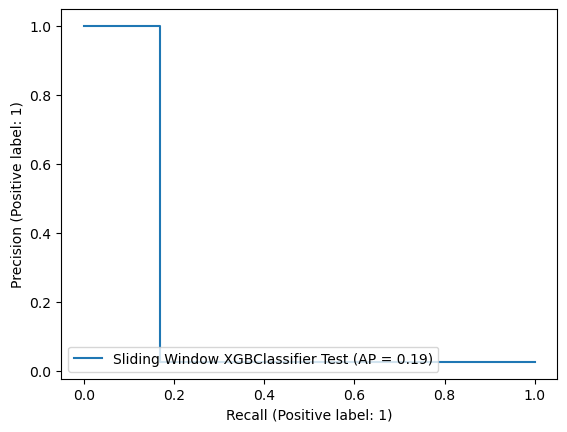

In [8]:
sliding_window_df = pd.read_csv(BASE_DIR + APP_SYS_NAME + '_sliding_window.csv')
cluster_cols = [col for col in sliding_window_df.columns if col.startswith('cluster_')]

#label_field = 'precision_label'
label_field = 'recall_label'

def simple_split(df):
    split_on = int(len(df.values)*0.50)
    train = df.values[:split_on]
    test = df.values[split_on:]
    train_df = pd.DataFrame(data=train, columns=df.columns)
    test_df = pd.DataFrame(data=test, columns=df.columns)
    return train_df, test_df

train_df, test_df = simple_split(sliding_window_df)
train_df[label_field] = train_df[label_field].astype('int')
test_df[label_field] = test_df[label_field].astype('int')

X_win_train = train_df[cluster_cols].astype('int')
y_win_train = train_df.loc[:, label_field]
X_win_test = test_df[cluster_cols].astype('int')
y_win_test = test_df.loc[:, label_field]

for clf in [DecisionTreeClassifier(class_weight='balanced', random_state=random_state),
              LogisticRegression(class_weight='balanced', random_state=random_state),
              XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')]:
    clf.fit(X_win_train, y_win_train)
    train_pred = clf.predict(X_win_train)
    test_pred = clf.predict(X_win_test)
    model_name = type(clf).__name__
    #report('Sliding Window ' + model_name + ' Train', train_pred, y_win_train)
    report('Sliding Window ' + model_name + ' Test', test_pred, y_win_test)

#dc = LogisticRegression(class_weight='balanced')
#dc.fit(X_window, y_recall)
#window_pred = dc.predict(X_window)
#report('Sliding Window Decision Tree Precision', window_pred, y_precision)
#report('Sliding Window Decision Tree Recall', window_pred, y_recall)

Sliding Window IsolationForest Recall Result:
Accuracy Score: 90.76%
_______________________________________________
CLASSIFICATION REPORT:
                  False    True  accuracy     macro avg  weighted avg
precision      0.907597     0.0  0.907597      0.453799      0.823733
recall         1.000000     0.0  0.907597      0.500000      0.907597
f1-score       0.951561     0.0  0.907597      0.475780      0.863634
support    85296.000000  8684.0  0.907597  93980.000000  93980.000000
_______________________________________________
Confusion Matrix: 
 [[85296     0]
 [ 8684     0]]

_______________________________________________
F1 Score: 
 0.0
_______________________________________________
Precision Score: 
 0.0
_______________________________________________
Recall Score: 
 0.0
_______________________________________________
Roc AUC Score: 
 0.5


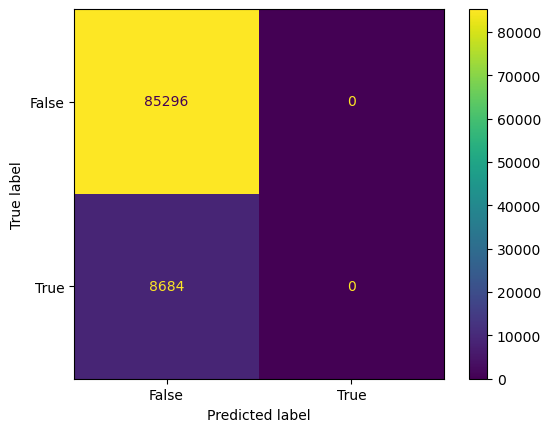

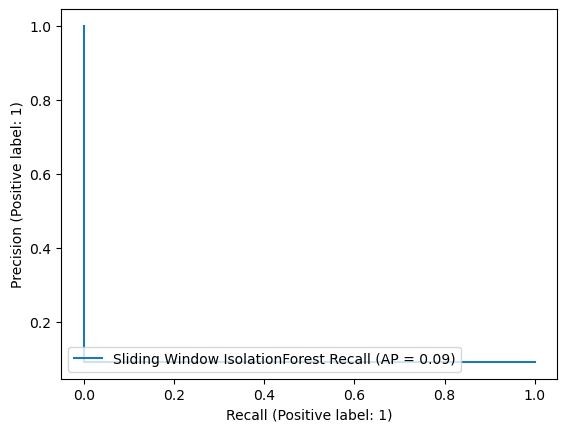

Sliding Window SGDOneClassSVM Recall Result:
Accuracy Score: 74.42%
_______________________________________________
CLASSIFICATION REPORT:
                  False         True  accuracy     macro avg  weighted avg
precision      0.928667     0.159238  0.744243      0.543953      0.857570
recall         0.777961     0.413058  0.744243      0.595510      0.744243
f1-score       0.846660     0.229862  0.744243      0.538261      0.789667
support    85296.000000  8684.000000  0.744243  93980.000000  93980.000000
_______________________________________________
Confusion Matrix: 
 [[66357 18939]
 [ 5097  3587]]

_______________________________________________
F1 Score: 
 0.22986222364626724
_______________________________________________
Precision Score: 
 0.1592382136198171
_______________________________________________
Recall Score: 
 0.4130584983878397
_______________________________________________
Roc AUC Score: 
 0.5955099751365198


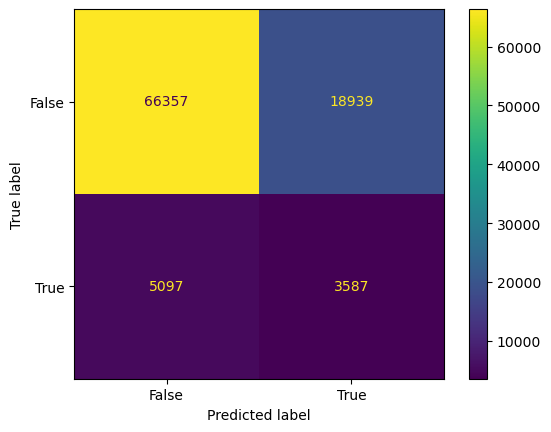

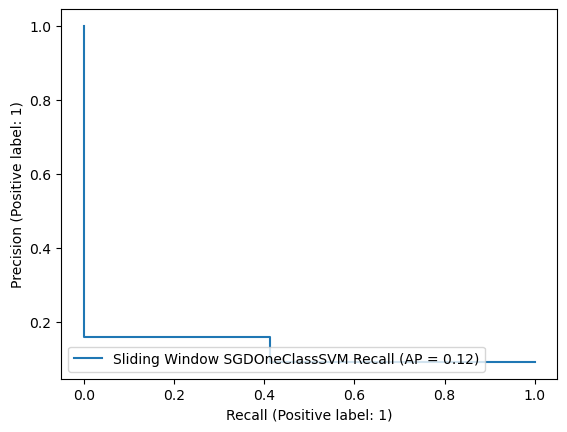

TFIDF text IsolationForest Recall Result:
Accuracy Score: 92.23%
_______________________________________________
CLASSIFICATION REPORT:
                  False    True  accuracy     macro avg  weighted avg
precision      0.922319     0.0  0.922319      0.461160      0.850673
recall         1.000000     0.0  0.922319      0.500000      0.922319
f1-score       0.959590     0.0  0.922319      0.479795      0.885048
support    86698.000000  7302.0  0.922319  94000.000000  94000.000000
_______________________________________________
Confusion Matrix: 
 [[86698     0]
 [ 7302     0]]

_______________________________________________
F1 Score: 
 0.0
_______________________________________________
Precision Score: 
 0.0
_______________________________________________
Recall Score: 
 0.0
_______________________________________________
Roc AUC Score: 
 0.5


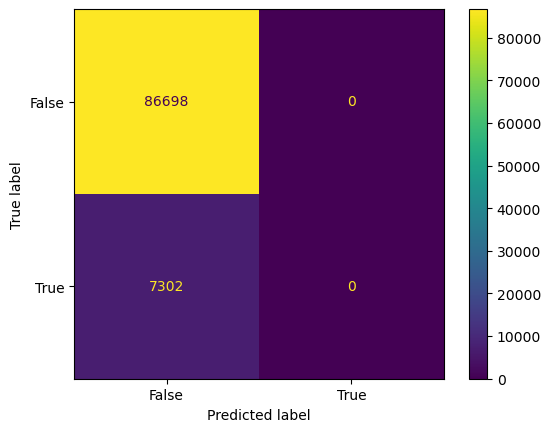

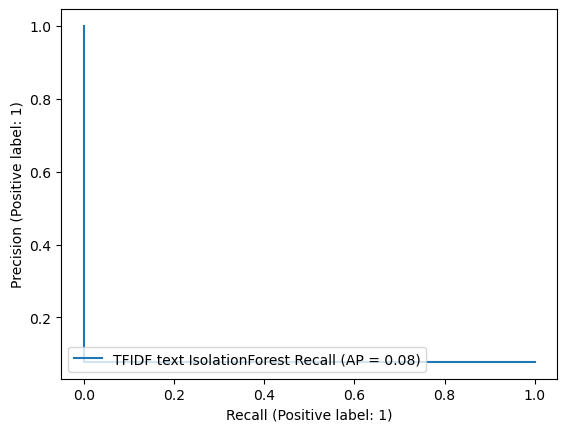

TFIDF text SGDOneClassSVM Recall Result:
Accuracy Score: 48.02%
_______________________________________________
CLASSIFICATION REPORT:
                  False         True  accuracy     macro avg  weighted avg
precision      0.880989     0.031410   0.48016      0.456200      0.814993
recall         0.504533     0.190770   0.48016      0.347651      0.480160
f1-score       0.641618     0.053939   0.48016      0.347779      0.595967
support    86698.000000  7302.000000   0.48016  94000.000000  94000.000000
_______________________________________________
Confusion Matrix: 
 [[43742 42956]
 [ 5909  1393]]

_______________________________________________
F1 Score: 
 0.05393893632262686
_______________________________________________
Precision Score: 
 0.03140995287379648
_______________________________________________
Recall Score: 
 0.19076965215009586
_______________________________________________
Roc AUC Score: 
 0.34765131434467356


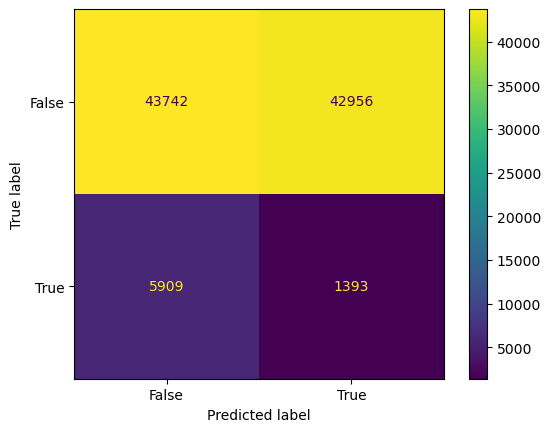

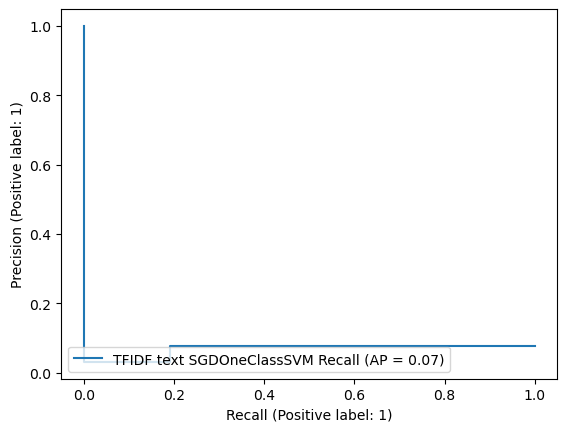

TFIDF tfidf_text IsolationForest Recall Result:
Accuracy Score: 92.23%
_______________________________________________
CLASSIFICATION REPORT:
                  False    True  accuracy     macro avg  weighted avg
precision      0.922319     0.0  0.922319      0.461160      0.850673
recall         1.000000     0.0  0.922319      0.500000      0.922319
f1-score       0.959590     0.0  0.922319      0.479795      0.885048
support    86698.000000  7302.0  0.922319  94000.000000  94000.000000
_______________________________________________
Confusion Matrix: 
 [[86698     0]
 [ 7302     0]]

_______________________________________________
F1 Score: 
 0.0
_______________________________________________
Precision Score: 
 0.0
_______________________________________________
Recall Score: 
 0.0
_______________________________________________
Roc AUC Score: 
 0.5


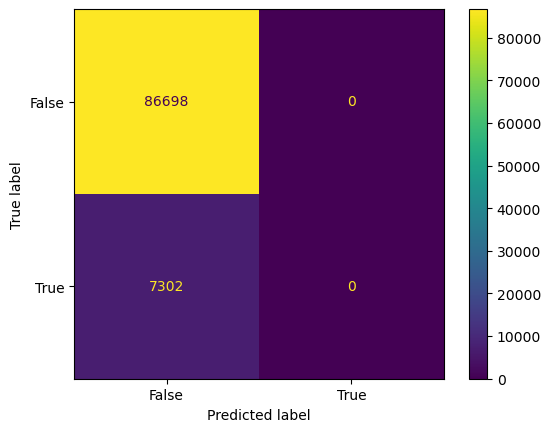

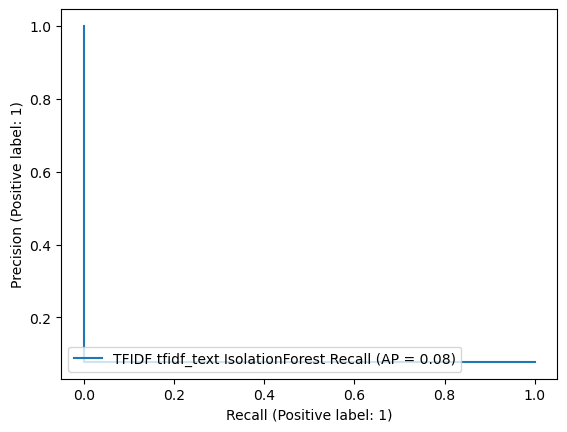

TFIDF tfidf_text SGDOneClassSVM Recall Result:
Accuracy Score: 60.60%
_______________________________________________
CLASSIFICATION REPORT:
                  False         True  accuracy     macro avg  weighted avg
precision      0.916068     0.066810  0.605989      0.491439      0.850097
recall         0.630580     0.314024  0.605989      0.472302      0.605989
f1-score       0.746975     0.110179  0.605989      0.428577      0.697508
support    86698.000000  7302.000000  0.605989  94000.000000  94000.000000
_______________________________________________
Confusion Matrix: 
 [[54670 32028]
 [ 5009  2293]]

_______________________________________________
F1 Score: 
 0.11017946808255051
_______________________________________________
Precision Score: 
 0.06681040762215554
_______________________________________________
Recall Score: 
 0.3140235551903588
_______________________________________________
Roc AUC Score: 
 0.4723016343392796


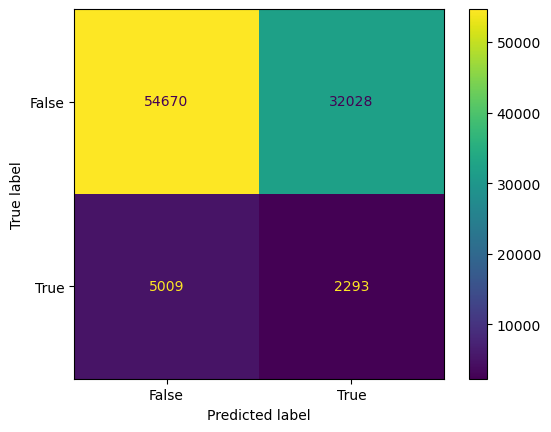

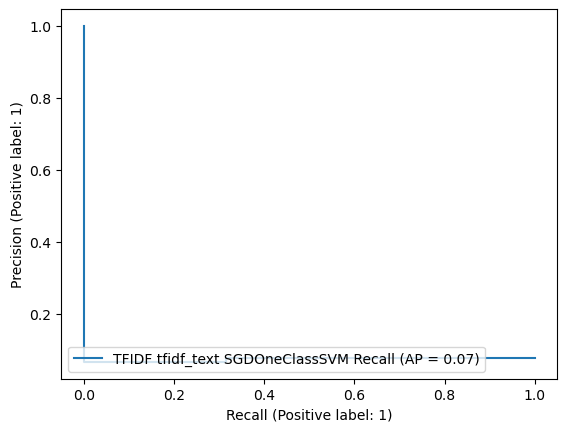

In [9]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.linear_model import SGDOneClassSVM
from sklearn.neighbors import LocalOutlierFactor

X_window = sliding_window_df[cluster_cols].astype('int')
y_precision = sliding_window_df['precision_label']
y_recall = sliding_window_df['recall_label']

for ModelClass in [IsolationForest, SGDOneClassSVM]:
    model = ModelClass(random_state=random_state)
    model_pred = model.fit_predict(X_window)
    model_pred[model_pred == 1] = 0
    model_pred[model_pred == -1] = 1
    model_name = type(model).__name__
    #report(model_name + ' Precision', model_pred, y_precision)
    report('Sliding Window ' + model_name + ' Recall', model_pred, y_recall)


for txt_col in ['text', 'tfidf_text']:
    tfidf = TfidfVectorizer()
    X_tfidf = tfidf.fit_transform(input_data[txt_col])
    y = input_data.loc[:,'label']
    for ModelClass in [IsolationForest, SGDOneClassSVM]:
        model = ModelClass(random_state=random_state)
        model_pred = model.fit_predict(X_tfidf)
        model_pred[model_pred == 1] = 0
        model_pred[model_pred == -1] = 1
        model_name = type(model).__name__
        report('TFIDF ' + txt_col + ' ' + model_name + ' Recall', model_pred, y)


# Supervised learning on TFIDF

TFIDF text DecisionTreeClassifier Test Result:
Accuracy Score: 98.37%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.999798     0.848844  0.983675      0.924321      0.986085
recall         0.982242     0.998011  0.983675      0.990126      0.983675
f1-score       0.990942     0.917403  0.983675      0.954173      0.984262
support    15092.000000  1508.000000  0.983675  16600.000000  16600.000000
_______________________________________________
Confusion Matrix: 
 [[14824   268]
 [    3  1505]]

_______________________________________________
F1 Score: 
 0.9174032307223408
_______________________________________________
Precision Score: 
 0.8488437676254935
_______________________________________________
Recall Score: 
 0.9980106100795756
_______________________________________________
Roc AUC Score: 
 0.9901264288139728


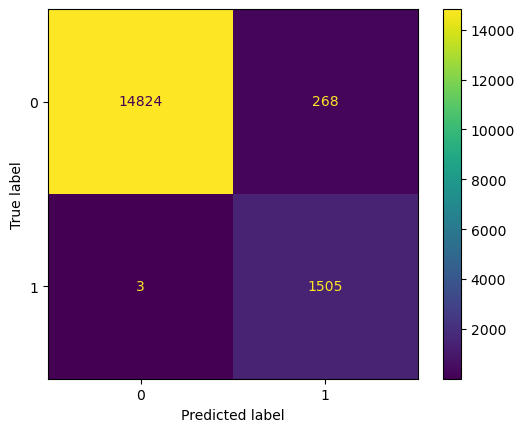

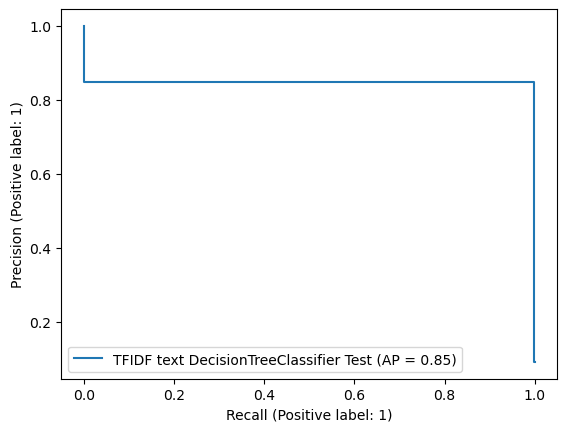

TFIDF text LogisticRegression Test Result:
Accuracy Score: 99.14%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.999799     0.915450  0.991446      0.957625      0.992137
recall         0.990790     0.998011  0.991446      0.994400      0.991446
f1-score       0.995274     0.954949  0.991446      0.975112      0.991611
support    15092.000000  1508.000000  0.991446  16600.000000  16600.000000
_______________________________________________
Confusion Matrix: 
 [[14953   139]
 [    3  1505]]

_______________________________________________
F1 Score: 
 0.9549492385786802
_______________________________________________
Precision Score: 
 0.9154501216545012
_______________________________________________
Recall Score: 
 0.9980106100795756
_______________________________________________
Roc AUC Score: 
 0.9944002162510256


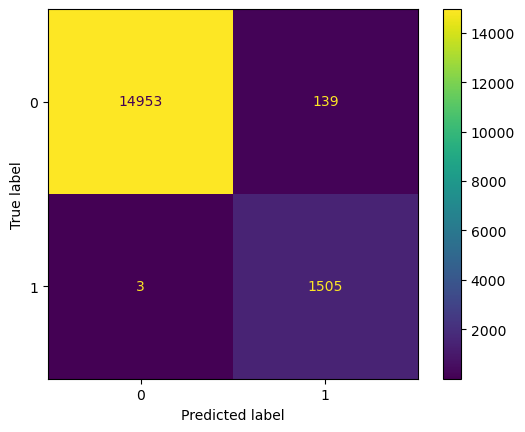

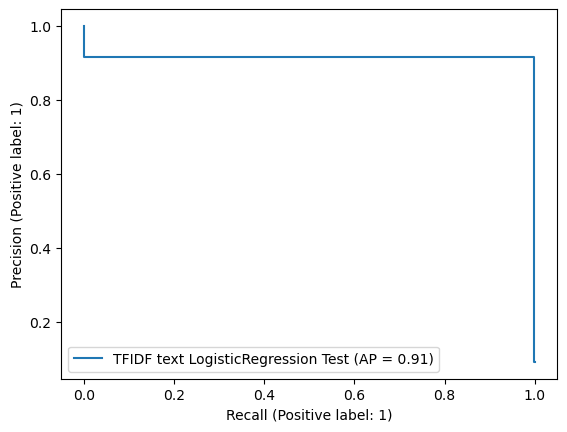

TFIDF text XGBClassifier Test Result:
Accuracy Score: 98.64%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.999395     0.873543  0.986386      0.936469      0.987962
recall         0.985622     0.994032  0.986386      0.989827      0.986386
f1-score       0.992461     0.929901  0.986386      0.961181      0.986777
support    15092.000000  1508.000000  0.986386  16600.000000  16600.000000
_______________________________________________
Confusion Matrix: 
 [[14875   217]
 [    9  1499]]

_______________________________________________
F1 Score: 
 0.9299007444168734
_______________________________________________
Precision Score: 
 0.8735431235431236
_______________________________________________
Recall Score: 
 0.9940318302387268
_______________________________________________
Roc AUC Score: 
 0.9898266757872669


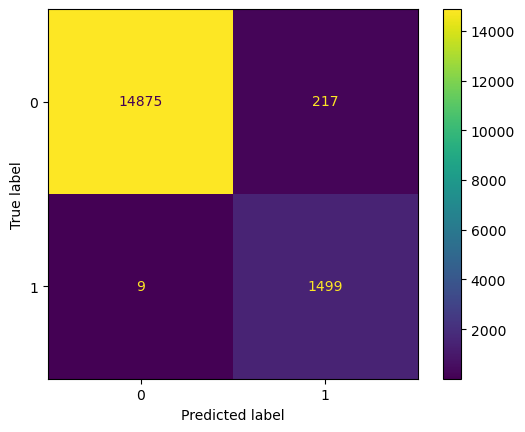

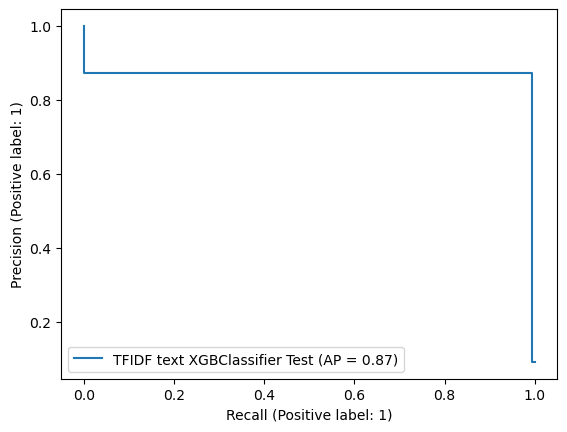

TFIDF tfidf_text DecisionTreeClassifier Test Result:
Accuracy Score: 99.44%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.999800     0.943574  0.994398      0.971687      0.994692
recall         0.994037     0.998011  0.994398      0.996024      0.994398
f1-score       0.996910     0.970029  0.994398      0.983469      0.994468
support    15092.000000  1508.000000  0.994398  16600.000000  16600.000000
_______________________________________________
Confusion Matrix: 
 [[15002    90]
 [    3  1505]]

_______________________________________________
F1 Score: 
 0.9700290041894941
_______________________________________________
Precision Score: 
 0.9435736677115988
_______________________________________________
Recall Score: 
 0.9980106100795756
_______________________________________________
Roc AUC Score: 
 0.9960235928744022


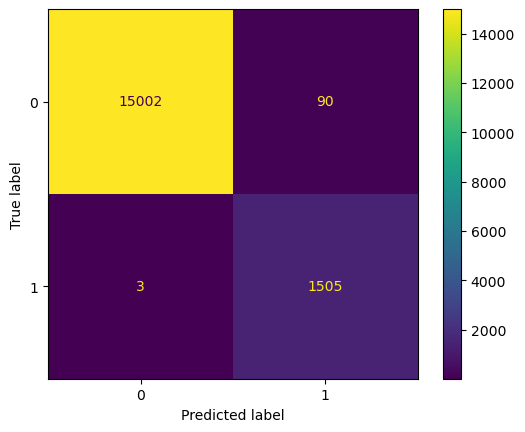

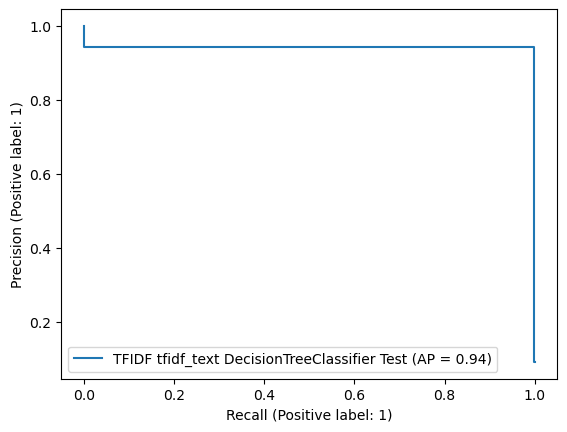

TFIDF tfidf_text LogisticRegression Test Result:
Accuracy Score: 99.94%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.999536     0.998005  0.999398      0.998771      0.999397
recall         0.999801     0.995358  0.999398      0.997580      0.999398
f1-score       0.999669     0.996680  0.999398      0.998174      0.999397
support    15092.000000  1508.000000  0.999398  16600.000000  16600.000000
_______________________________________________
Confusion Matrix: 
 [[15089     3]
 [    7  1501]]

_______________________________________________
F1 Score: 
 0.9966799468791502
_______________________________________________
Precision Score: 
 0.9980053191489362
_______________________________________________
Recall Score: 
 0.9953580901856764
_______________________________________________
Roc AUC Score: 
 0.9975796546873253


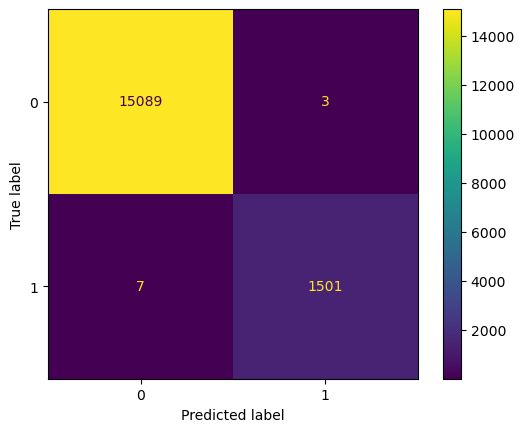

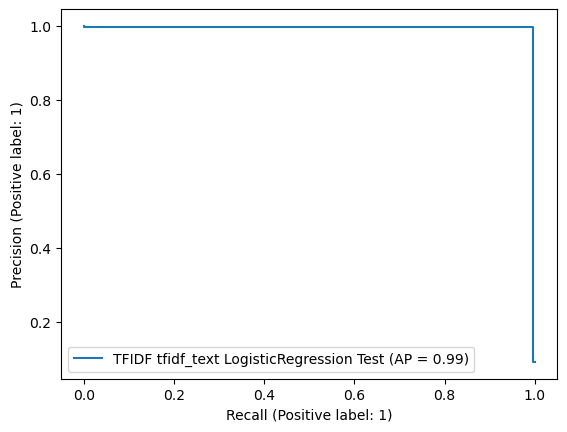

TFIDF tfidf_text XGBClassifier Test Result:
Accuracy Score: 99.66%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.999402     0.969599  0.996627      0.984501      0.996695
recall         0.996886     0.994032  0.996627      0.995459      0.996627
f1-score       0.998142     0.981663  0.996627      0.989903      0.996645
support    15092.000000  1508.000000  0.996627  16600.000000  16600.000000
_______________________________________________
Confusion Matrix: 
 [[15045    47]
 [    9  1499]]

_______________________________________________
F1 Score: 
 0.9816633922724296
_______________________________________________
Precision Score: 
 0.9695989650711514
_______________________________________________
Recall Score: 
 0.9940318302387268
_______________________________________________
Roc AUC Score: 
 0.9954587987663286


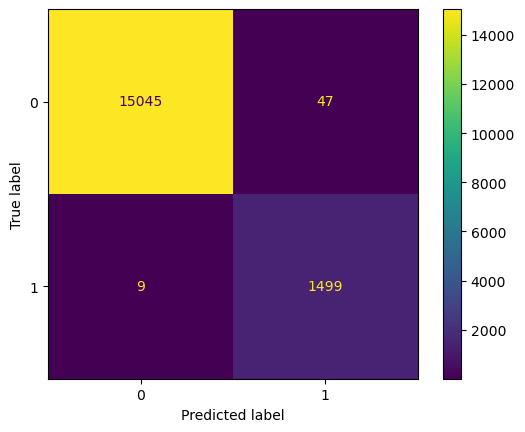

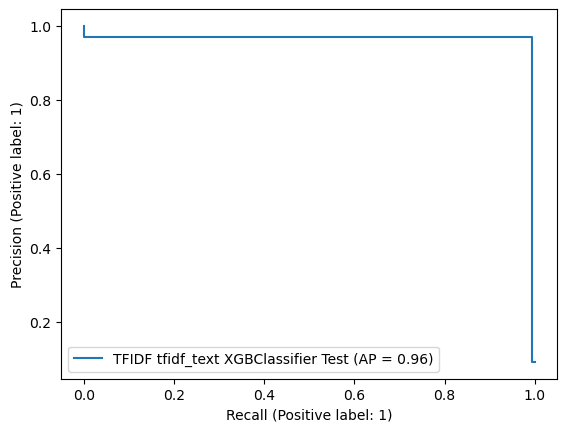

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

for txt_col in ['text', 'tfidf_text']:
    tfidf = TfidfVectorizer()
    X_train_tfidf = tfidf.fit_transform(train[txt_col])
    y_train = train.loc[:,'label']
    X_test_tfidf = tfidf.transform(test[txt_col])
    y_test = test.loc[:,'label']

    for clf in [DecisionTreeClassifier(class_weight='balanced', random_state=random_state),
                  LogisticRegression(class_weight='balanced', random_state=random_state),
                  XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic', seed=random_state)]:
        clf.fit(X_train_tfidf, y_train)
        train_pred = clf.predict(X_train_tfidf)
        test_pred = clf.predict(X_test_tfidf)
        model_name = type(clf).__name__
        report('TFIDF ' + txt_col + ' ' + model_name + ' Test', test_pred, y_test)